<a href="https://colab.research.google.com/github/isdeniz/msc-2024/blob/main/llama3_8b_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [2]:
!python3.10 -m pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [3]:
!python3.10 -m pip install langchain-core

In [4]:
!python3.10 -m pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.8 MB/s eta 0:00:00


In [5]:
from langchain_community.llms import Ollama
llm = Ollama(model = "llama3", num_ctx=8192, temperature=0)

In [6]:
pip install tqdm

In [7]:
import pandas as pd
from tqdm import tqdm
import numpy as np

In [8]:
test_sample = pd.read_pickle('data/set_p_llama.pkl')
print('Number of issues: ', test_sample.shape)

Number of issues:  (4222, 5)


In [9]:
test_sample.head()

,original_issue_title,original_issue_body,issue_label,llama3_8b_classification_final,llama3_70b_classification_final
0,"qssh: function key f1 broken in iTerm2 when ""R...",Other keys affected as well.,bug,bug,bug
2,[Feature Request] Int arrray,Deswegen,enhancement,enhancement,enhancement
4,In bibliography module sort menu change Author...,"Could we change ""Author"" here to ""Author/Edito...",enhancement,enhancement,enhancement
5,Move to docker,Use Docker to build local stuff,enhancement,enhancement,enhancement
6,Blog Post,## Description\n\n### User Story\n\n- When I c...,enhancement,enhancement,enhancement


In [10]:
test_sample = test_sample.reset_index(drop = False)

In [11]:
test_sample.head()

,index,original_issue_title,original_issue_body,issue_label,llama3_8b_classification_final,llama3_70b_classification_final
0,0,"qssh: function key f1 broken in iTerm2 when ""R...",Other keys affected as well.,bug,bug,bug
1,2,[Feature Request] Int arrray,Deswegen,enhancement,enhancement,enhancement
2,4,In bibliography module sort menu change Author...,"Could we change ""Author"" here to ""Author/Edito...",enhancement,enhancement,enhancement
3,5,Move to docker,Use Docker to build local stuff,enhancement,enhancement,enhancement
4,6,Blog Post,## Description\n\n### User Story\n\n- When I c...,enhancement,enhancement,enhancement


Run for all issues :)

In [12]:
s = test_sample.shape[0] // 1000
print(s)

4


In [13]:
x = 1
i = 0

while x < (s+1):
    i = (x - 1) * 1000
    n = x * 1000
    with tqdm(total = (n - i), ncols = 100) as pbar:
        while i < n:
            try:
                test_sample.loc[i,'llama3_8b_prediction'] = llm.invoke(f"""Classify the following issue as "bug", "enhancement", "question" or "other" and rate your classification confidence and issue understandability in range 0 - 100. Your answer should only include:
Classification: your classification answer
Prediction Confidence: your level of confidence
Issue Understandability: level of understandability
Do not provide any explanation.
Issue Title: {test_sample.loc[i,'original_issue_title']}
Issue Body: {test_sample.loc[i,'original_issue_body']}
""")
                pbar.update(1)
                i = i + 1
            except:
                print('exception')
                continue
    test_sample.to_pickle('data/set_p_llama_8b_preds.pkl')
    print(f'Categorization of {n} issues is complete')
    x = x + 1

100%|███████████████████████████████████████████████████████████| 1000/1000 [06:39<00:00,  2.50it/s]


Categorization of 1000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [06:40<00:00,  2.50it/s]


Categorization of 2000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [06:30<00:00,  2.56it/s]


Categorization of 3000 issues is complete


100%|███████████████████████████████████████████████████████████| 1000/1000 [06:42<00:00,  2.48it/s]

Categorization of 4000 issues is complete


In [14]:
print(x)

5


In [16]:
i = (x - 1) * 1000
n = test_sample.shape[0]
with tqdm(total = (n - i), ncols = 100) as pbar:
  while i < n:
    try:
      test_sample.loc[i,'llama3_8b_prediction'] = llm.invoke(f"""Classify the following issue as "bug", "enhancement", "question" or "other" and rate your classification confidence and issue understandability in range 0 - 100. Your answer should only include:
Classification: your classification answer
Prediction Confidence: your level of confidence
Issue Understandability: level of understandability
Do not provide any explanation.
Issue Title: {test_sample.loc[i,'original_issue_title']}
Issue Body: {test_sample.loc[i,'original_issue_body']}
""")
      pbar.update(1)
      i = i + 1
    except:
      print('exception')
      continue

test_sample.to_pickle('data/set_p_llama_8b_preds.pkl')
print(f'Categorization of {n} issues are completed and saved')


100%|█████████████████████████████████████████████████████████████| 222/222 [01:26<00:00,  2.55it/s]

Categorization of 4222 issues are completed and saved


In [17]:
len(test_sample['llama3_8b_prediction'].unique())

102

In [18]:
test_sample.tail()

,index,original_issue_title,original_issue_body,issue_label,llama3_8b_classification_final,llama3_70b_classification_final,llama3_8b_prediction
4217,4995,Generate OpenGraph metatag,NaN,enhancement,enhancement,enhancement,Classification: enhancement\nPrediction Confid...
4218,4996,SCVM 상태조회시 nic정보 조회 방식 변경,## 개발 개요\nSCVM 상태조회시 nic정보 조회 방식 변경해야함.\n기존방식은...,enhancement,enhancement,enhancement,Classification: enhancement\nPrediction Confid...
4219,4997,Question: allow offline building,"I have no idea about how to code in Go, but I'...",question,question,enhancement,Classification: enhancement\nPrediction Confid...
4220,4998,Add ios_unsupported_pods,"Hi. Your code is working great, but I think th...",enhancement,enhancement,enhancement,Classification: Enhancement\nPrediction Confid...
4221,4999,Is Data Center Version planned?,We are using Confluence Data Center Version 6....,question,enhancement,question,Classification: Enhancement\nPrediction Confid...


In [19]:
def parse_clf(text):
    lines = [x.strip().lower() for x in text.split('\n')]
    c = ''
    for line in lines:
        if line.startswith('classification:'):
            c = line.split(':')[1].strip()
            break
    return c

def parse_conf(text):
    lines = [x.strip().lower() for x in text.split('\n')]
    pc = ''
    for line in lines:
        if line.startswith('prediction confidence:'):
            pc = line.split(':')[1].strip()
            break
    return pc

def parse_understd(text):
    lines = [x.strip().lower() for x in text.split('\n')]
    u = ''
    for line in lines:
        if line.startswith('issue understandability:'):
            u = line.split(':')[1].strip()
            break
    return u

In [20]:
test_sample['llama3_8b_classification'] = test_sample['llama3_8b_prediction'].apply(parse_clf)

In [21]:
test_sample['llama3_8b_classification'].value_counts()

,count
llama3_8b_classification,
bug,2106
enhancement,2045
question,59
,11
**bug**,1


In [22]:
test_sample[test_sample['llama3_8b_classification_final'] != test_sample['llama3_8b_classification']]

,index,original_issue_title,original_issue_body,issue_label,llama3_8b_classification_final,llama3_70b_classification_final,llama3_8b_prediction,llama3_8b_classification
64,81,Question: Is there a way to remove markdown sy...,"\nHi,\nI use Commonmark and it works well but ...",question,question,question,Classification: enhancement\nPrediction Confid...,enhancement
65,82,Delete the events collection,https://github.com/jiyuujin/admin/issues/1082,enhancement,bug,enhancement,Classification: Enhancement\nPrediction Confid...,enhancement
79,100,Completion with $ escaped not applied properly...,Case:\n\n```\n*** Keywords ***\nSome Keyword W...,bug,bug,bug,Classification: enhancement\nPrediction Confid...,enhancement
85,107,Maps are looking strange on the dI website,## I'm submitting a ...\nCheck one of the foll...,bug,enhancement,bug,Classification: Bug\nPrediction Confidence: 80...,bug
120,156,issue with directory of the same name/architec...,Hi Mike\n\nFirst of all thank you very much fo...,bug,bug,bug,Classification: enhancement\nPrediction Confid...,enhancement
...,...,...,...,...,...,...,...,...
4149,4906,make fails when running on two machines,### Summary\n\nWhen I run a playbook for more ...,bug,bug,bug,"I would classify this issue as ""other"". The te...",
4158,4919,conventional-pr not working anymore with stric...,"Hello,\n\nThe conventional-pr is not working a...",bug,bug,bug,Classification: enhancement\nPrediction Confid...,enhancement
4178,4944,"vision_darknet_detect fails to ""tag"" traffic l...",## Bug report\n\n### Required information:\n\n...,bug,bug,bug,Classification: enhancement\nPrediction Confid...,enhancement
4190,4957,wagtail-localize: prepare MozFest site for wag...,"<img width=""943"" alt=""Capture d’écran 2021-01...",bug,bug,enhancement,Classification: enhancement\nPrediction Confid...,enhancement


In [23]:
test_sample['llama3_8b_confidence'] = test_sample['llama3_8b_prediction'].apply(parse_conf)

In [24]:
test_sample['llama3_8b_confidence'].value_counts()

,count
llama3_8b_confidence,
80,2539
90,1411
95,140
100,104
60,12
,11
70,4
20,1


In [25]:
test_sample['llama3_8b_understandability'] = test_sample['llama3_8b_prediction'].apply(parse_understd)

In [26]:
test_sample['llama3_8b_understandability'].value_counts()

,count
llama3_8b_understandability,
90,2201
80,1186
20,256
95,196
60,158
50,94
100,88
70,22
,11


In [27]:
test_sample[test_sample['llama3_8b_classification'] == '']

,index,original_issue_title,original_issue_body,issue_label,llama3_8b_classification_final,llama3_70b_classification_final,llama3_8b_prediction,llama3_8b_classification,llama3_8b_confidence,llama3_8b_understandability
531,675,from the cloud about adding cleaning. try unde...,Hibernate:\nJan 28 04:27:42 ip-172-31-32-174 w...,bug,question,bug,This is a log message from a Java-based web ap...,,,
757,947,ufuzz failure,```js\n// original code\n// (beautified)\nvar ...,bug,enhancement,question,"This is a very complex piece of code, and it's...",,,
1012,1253,Unable to switch kernels Jupyter VS Code MacOS,<!-- Please search existing issues to avoid cr...,bug,bug,bug,"I would classify this issue as ""other"". The ou...",,,
1290,1581,map-reduce example irregularly fails to retrie...,## Summary \nRecently upgraded to argo v3.0.0-...,bug,bug,bug,"I would classify this issue as ""bug"". The work...",,,
1825,2208,Chat translator does not work,\n## Description\nWhat's wrong?\nI am unable t...,bug,question,bug,"I would classify this issue as a ""bug"". The er...",,,
1951,2353,LND doens't properly start. Keeps crashing..,**Describe the bug**\nKind of 'suddenly' i cou...,bug,bug,bug,"Based on the log output, I would classify this...",,,
3634,4303,Segfault on startup macOS 11.2.2,<!--\nBefore reporting please do :\n\nUpdate y...,bug,bug,bug,A fascinating set of outputs!\n\nLet's break t...,,,
3637,4308,[package] xz_utils/5.2.5: build fails on AppVe...,<!-- \n Please don't forget to update the iss...,bug,bug,bug,A Conan package build failure!\n\nThe issue is...,,,
3831,4543,Error in `julia': double free or corruption (o...,"**Describe the bug**\nWhile using DiffEqFlux, ...",bug,bug,bug,"Based on the provided information, I would cla...",,,
3894,4615,Issue creating venv,Had a `mu_venv` already present and working fr...,bug,enhancement,bug,It looks like there are some issues with creat...,,,


In [28]:
test_sample.loc[531,'llama3_8b_classification'] = 'question'
test_sample.loc[531,'llama3_8b_confidence'] = '80'
test_sample.loc[531,'llama3_8b_understandability'] = '90'

test_sample.loc[757,'llama3_8b_classification'] = 'enhancement'
test_sample.loc[757,'llama3_8b_confidence'] = '20'
test_sample.loc[757,'llama3_8b_understandability'] = '80'

test_sample.loc[1012,'llama3_8b_classification'] = 'bug'
test_sample.loc[1012,'llama3_8b_confidence'] = '80'
test_sample.loc[1012,'llama3_8b_understandability'] = '90'

test_sample.loc[1290,'llama3_8b_classification'] = 'bug'
test_sample.loc[1290,'llama3_8b_confidence'] = '80'
test_sample.loc[1290,'llama3_8b_understandability'] = '90'

test_sample.loc[1825,'llama3_8b_classification'] = 'question'
test_sample.loc[1825,'llama3_8b_confidence'] = '80'
test_sample.loc[1825,'llama3_8b_understandability'] = '90'

test_sample.loc[1951,'llama3_8b_classification'] = 'bug'
test_sample.loc[1951,'llama3_8b_confidence'] = '80'
test_sample.loc[1951,'llama3_8b_understandability'] = '90'

test_sample.loc[3634,'llama3_8b_classification'] = 'bug'
test_sample.loc[3634,'llama3_8b_confidence'] = '80'
test_sample.loc[3634,'llama3_8b_understandability'] = '90'

test_sample.loc[3637,'llama3_8b_classification'] = 'bug'
test_sample.loc[3637,'llama3_8b_confidence'] = '80'
test_sample.loc[3637,'llama3_8b_understandability'] = '90'

test_sample.loc[3831,'llama3_8b_classification'] = 'bug'
test_sample.loc[3831,'llama3_8b_confidence'] = '90'
test_sample.loc[3831,'llama3_8b_understandability'] = '95'

test_sample.loc[3894,'llama3_8b_classification'] = 'enhancement'
test_sample.loc[3894,'llama3_8b_confidence'] = '80'
test_sample.loc[3894,'llama3_8b_understandability'] = '90'

test_sample.loc[4149,'llama3_8b_classification'] = 'bug'
test_sample.loc[4149,'llama3_8b_confidence'] = '80'
test_sample.loc[4149,'llama3_8b_understandability'] = '90'


In [29]:
test_sample['llama3_8b_classification'].value_counts()

,count
llama3_8b_classification,
bug,2113
enhancement,2047
question,61
**bug**,1


In [30]:
test_sample[test_sample['llama3_8b_classification'] == '**bug**']

,index,original_issue_title,original_issue_body,issue_label,llama3_8b_classification_final,llama3_70b_classification_final,llama3_8b_prediction,llama3_8b_classification,llama3_8b_confidence,llama3_8b_understandability
2264,2718,[iGemm][test_conv2d][gfx908][half] Verificatio...,test_conv2d with fp16 convolution failed\nGPU:...,bug,bug,bug,Classification: **Bug**\nPrediction Confidence...,**bug**,80,90


In [31]:
test_sample.loc[2264,'llama3_8b_classification'] = 'bug'

In [32]:
test_sample['llama3_8b_classification'].value_counts()

,count
llama3_8b_classification,
bug,2114
enhancement,2047
question,61


In [33]:
test_sample['llama3_8b_confidence'].value_counts()

,count
llama3_8b_confidence,
80,2548
90,1412
95,140
100,104
60,12
70,4
20,2


In [34]:
test_sample['llama3_8b_understandability'].value_counts()

,count
llama3_8b_understandability,
90,2210
80,1187
20,256
95,197
60,158
50,94
100,88
70,22
0,10


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

original_labels = test_sample['issue_label']
predicted_labels = test_sample['llama3_8b_classification']

all_classes = sorted(set(original_labels) | set(predicted_labels))

confusion_matrix = confusion_matrix(original_labels, predicted_labels, labels=all_classes)

class_report = classification_report(original_labels, predicted_labels, target_names=all_classes, digits=4)
conf_matrix_df = pd.DataFrame(confusion_matrix, index=all_classes, columns=all_classes)

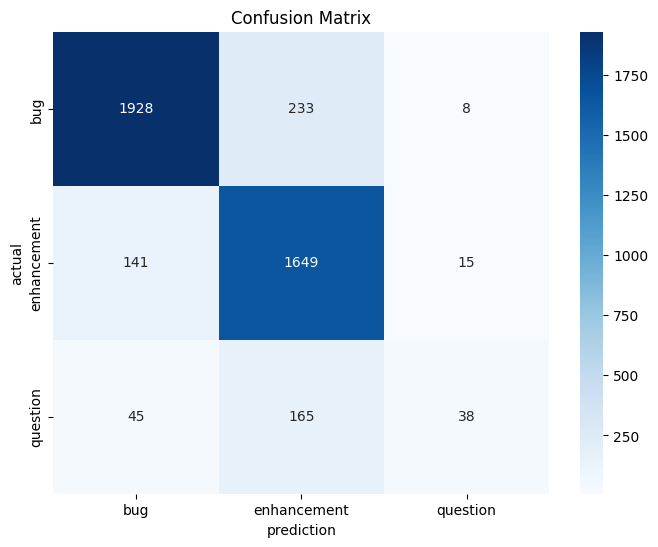

In [37]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_df,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
print(class_report)

              precision    recall  f1-score   support

         bug     0.9120    0.8889    0.9003      2169
 enhancement     0.8056    0.9136    0.8562      1805
    question     0.6230    0.1532    0.2460       248

    accuracy                         0.8562      4222
   macro avg     0.7802    0.6519    0.6675      4222
weighted avg     0.8495    0.8562    0.8430      4222

